In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
##CNN
#image vecter -> conv layers -> subsampling(pool)

(1, 3, 3, 1)


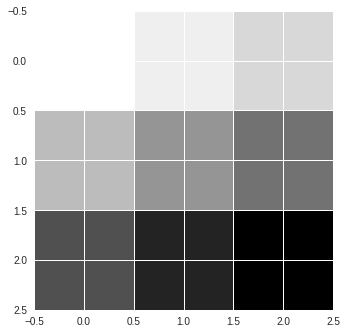

In [3]:
#Simple convolution layer
#3x3x1 image, 2x2x1 Filter -> 2x2x1 layer
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = "Greys")
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


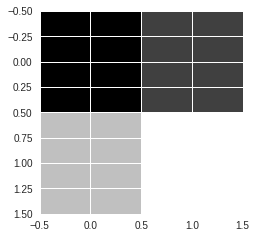

In [4]:
#Simple convolutional layer
#shape of parameters
#Image: 1,3,3,1 ;; Filter: 2,2,1,1 ;; Stride: 1x1 ;; Padding: VALID
#Image: (image의 수, row, col, channel(깊이..?)),
#Filter: (row, col, channel, filter의 수)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) ##Filter (weight -> 1로 초기화)
print("weight.shape",weight.shape)
#Q. strides = [1,1,1,1] <- 이게 어떻게 1x1 stride인거지???
#1x1x1x1 이라는 뜻인가..?
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = "VALID")
conv2d_img = conv2d.eval()
print("conv2d_img.shape",conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2)) # <- 1111필터로 필터안의 값들의 합으로 layer 형성. 
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2),cmap = "gray")
    plt.show()

#Image: (image의 수, row, col, channel(깊이..?)),
#Filter: (row, col, channel, filter의 수)
#Image는 앞에 image의 수, Filter는 뒤에 filter의 수를 붙여준다.


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


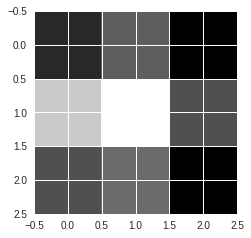

In [5]:
#Pdding: SAME 의 경우,
#Filter, stride의 크기에 상관없이 output layer가 input과 동일한 size가 되도록 padding 함

#Simple convolutional layer
#shape of parameters
#Image: 1,3,3,1 ;; Filter: 2,2,1,1 ;; Stride: 1x1 ;; Padding: VALID (Padding없이)
#Image: (image의 수, row, col, channel(깊이..?)),
#Filter: (row, col, channel, filter의 수)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) ##Filter (weight -> 1로 초기화)
print("weight.shape",weight.shape)
#Q. strides = [1,1,1,1] <- 이게 어떻게 1x1 stride인거지???
#1x1x1x1 이라는 뜻인가..?
#padding = "SAME" 조건으로 conv2d가 1,3,3,1 shape이 되도록 자동적으로 1 padding이 됨
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = "SAME")
conv2d_img = conv2d.eval()
print("conv2d_img.shape",conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3)) # <- 1111필터로 필터안의 값들의 합으로 layer 형성. 
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3),cmap = "gray")
    plt.show()
    #cmap = "gray"는 1~9,10~18,19~27...순으로 밝은것부터 제일 어두운색까지 반복되는듯.
    #cmap = "Greys"는 반대로 1~9,10~18,19~27...순으로 어두운것부터 제일 밝은색까지 반복되는듯.

(1, 3, 3, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


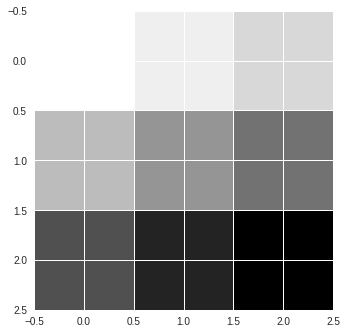

In [6]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap="Greys")
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(1, 3, 3, 1)
(2, 2, 1, 3)
(1, 2, 2, 3)
[[12. 16.]
 [24. 28.]]
[[120. 160.]
 [240. 280.]]
[[-12. -16.]
 [-24. -28.]]


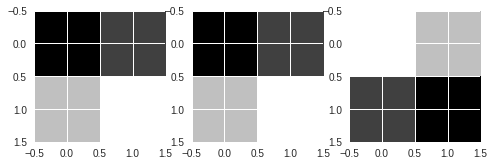

In [7]:
#Image 1개, Filter 3개, Stride 1x1, Padding: VALID
#1,3,3,1     2,2,1,3
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32) #shape = (1,3,3,1)
print(image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]]) # shape = (2,2,1,3)
print(weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = "VALID")
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    #one_img =  [[[12.][16.]][[24.][28.]]] 
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(2,2),cmap = "gray")
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(1, 3, 3, 1)
(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


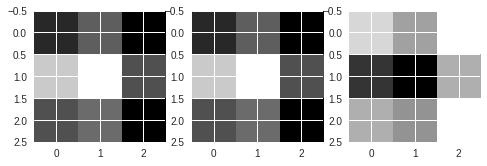

In [8]:
#Image 1개, Filter 2개, Stride 1x1, Padding: SAME
#1,3,3,1     2,2,1,1
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32) #shape = (1,3,3,1)
print(image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]]) # shape = (2,2,1,3)
print(weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = "SAME")
conv2d_img = conv2d.eval()
print(conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    #one_img =  [[[12.][16.]][[24.][28.]]] 
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3),cmap = "gray")
plt.show()

In [9]:
#Max Pooling
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype = np.float32)
pool = tf.nn.max_pool(image, ksize = [1,2,2,1], 
                        strides = [1,1,1,1], padding="SAME")
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


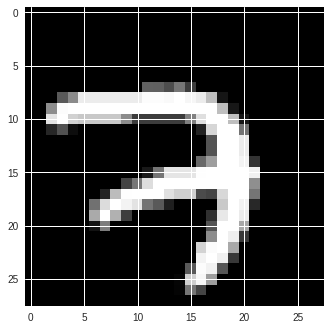

In [12]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap="gray")
plt.show()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


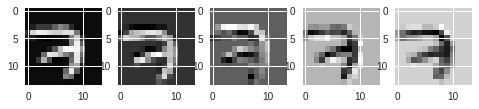

In [13]:
#MNIST convolution layer
img = mnist.train.images[0].reshape(28,28)

sess = tf.InteractiveSession()
#1 image of 28x28x1
#-1은 unknown demention 이라고 하는거보니 -1은 알아서 계산됨
img = img.reshape(-1,28,28,1) #-1:n개, 28x28x1 -> 1색깔, 28x28 image
#5 Filters of 3x3x1 (random([shape],standard deviation=0.01))
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
#stride = 2x2x1
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding="SAME")
print(conv2d)
#padding = "SAME"이니까 28+1 -> 29로 계산
#(29-3)/2 +1 =14 -> output of 1x14x14x1 

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap = "gray")
plt.show()


Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


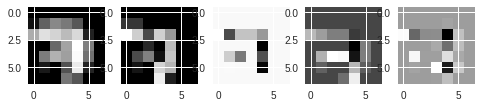

In [14]:
#위코드의 conv2d를 이용한 max pooling
#stride가 2x2x1에, padding="SAME" 이니까 14x14 -> 7x7이 됨
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], 
                      strides=[1,2,2,1], padding="SAME")
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap = "gray")
plt.show()
#sub sampling을 했기에 해상도는 떨어져있음